# COMP 579 Assignment 1

**Author Information**
* Barry Li: 
    * 260912069
    * weien.li@mail.mcgill.ca
* Minzhe Feng: 
    * 260886087
    * minzhe.feng@mail.mcgill.ca

Link to Colab: https://colab.research.google.com/drive/1bT43Dauv1D7zqII6yB3yLlQkzwrcggpw?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Q1

Declaring Bandit Class

In [ ]:
class Bandit:
    def __init__(self, arms, ps):
        self.armnumber = arms
        self.ps = ps

    def sample(self, arm_index):
        assert arm_index < self.armnumber and arm_index >= 0
        return np.random.binomial(1, self.ps[arm_index], 1)

Declare a bandit object for Q1

In [ ]:
q1bandit = Bandit(3,[0.5,0.4,0.3])

In [ ]:
samples = []
for i in range(5):
    r = samples.append(q1bandit.sample(1)[0])
samples

[1, 0, 0, 0, 0]

In [ ]:
def sample1(bandit, n, arm_index):
    samples = []
    for i in range(n):
        r = samples.append(bandit.sample(arm_index)[0])
    return samples


def sample_graph(bandit, n, arm_index):
    True_p = bandit.ps[arm_index]
    samples = sample1(bandit, n, arm_index)
    xaxis = np.arange(1, n + 1)
    avg = samples.count(1) / n
    plt.figure(figsize=(10, 10))
    plt.hlines(y=True_p, color='r', linestyle='-',
               label='True probablity(Expectation)',xmin=1,xmax = n)
    plt.hlines(y=avg, color='b', linestyle='-',
               label='Empirical Probablity(Estimation)',xmin=1,xmax = n)
    plt.plot(xaxis, samples,"o", label = "Samples")
    plt.xlabel("Sample Index")
    plt.ylabel("Rewards")
    plt.title('{0} Arm {1}'.format(n,(arm_index + 1)))
    plt.legend()
    plt.show()
    return samples

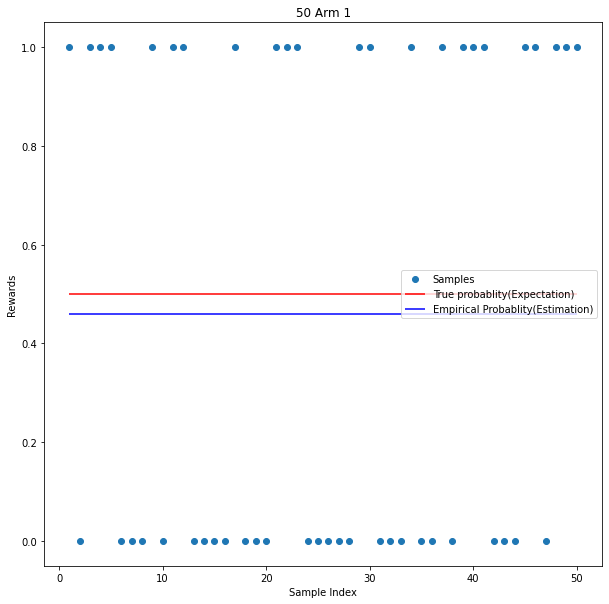

In [ ]:
#action 1
action1_sample = sample_graph(q1bandit,50,0)

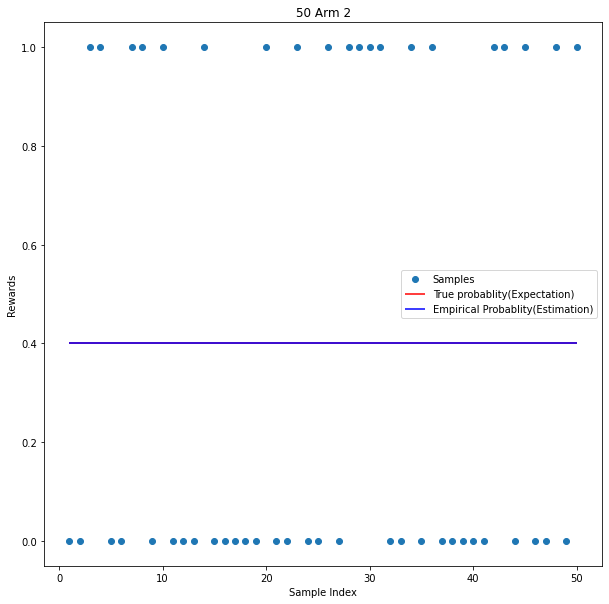

In [ ]:
# action 2
action2_sample = sample_graph(q1bandit,50,1)

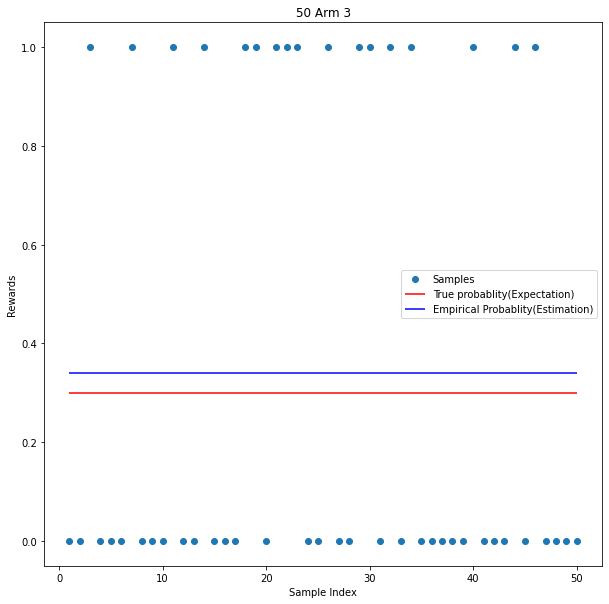

In [ ]:
#action 3
action3_sample = sample_graph(q1bandit,50,2)

## Q2

In [ ]:
def update(old_est, stepsize, target):  # stepsize is alpha
    return old_est + stepsize * (target - old_est)


def q_estimate(targets):
    est0 = [0]  # alpha 0.01
    est1 = [0]  # alpha 0.1
    est_avg = [0]  # alpha = 1/n
    n = len(targets)
    for i in range(1, n):
        est0.append(update(est0[i - 1], 0.01, targets[i - 1]))
        est1.append(update(est1[i - 1], 0.1, targets[i - 1]))
        est_avg.append(update(est_avg[i - 1], 1 / i, targets[i - 1]))
    return est0, est1, est_avg

def updateAvg(targets,arm_index): #target is the list of rewards sampled
    n = len(targets)
    True_p = q1bandit.ps[arm_index]
    est0,est1,est_avg = q_estimate(targets)
    xaxis = np.arange(1,n+1)
    plt.figure(figsize=(10, 10))
    plt.hlines(y=True_p, color='r', linestyle='-',
                label='True probablity(Expectation)',xmin=1,xmax = n)
    plt.plot(xaxis, est0,"blue", label = "alpha=0.01")
    plt.plot(xaxis, est1,"orange", label = "alpha=0.1")
    plt.plot(xaxis, est_avg,"green", label = "Averaging")
    plt.xlabel("Sample Index")
    plt.ylabel("Rewards")
    plt.title(
        'Different stepsize update for Arm {1} with {0} samples'.format(
            n,(arm_index + 1)))
    plt.legend()
    plt.show()

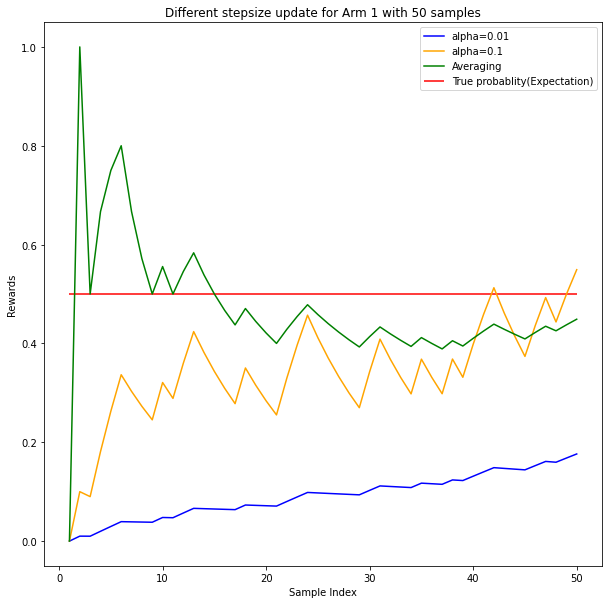

In [ ]:
updateAvg(action1_sample,0)

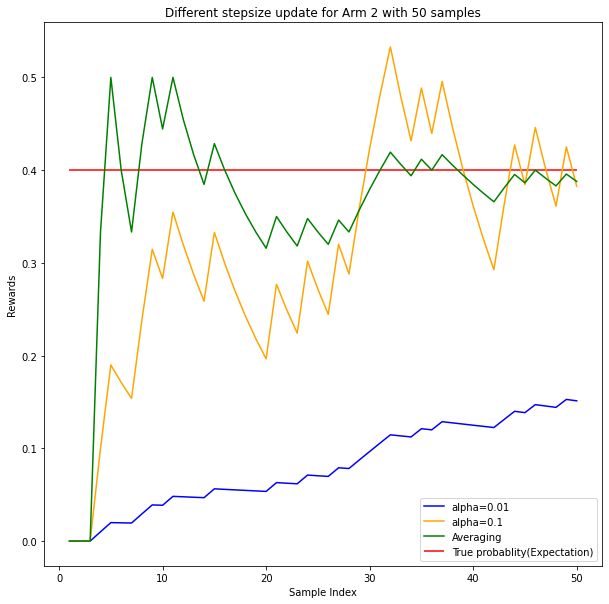

In [ ]:
updateAvg(action2_sample,1)

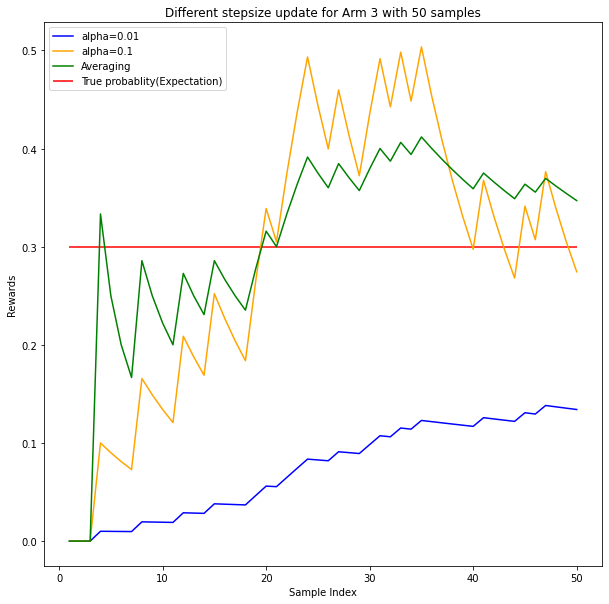

In [ ]:
updateAvg(action3_sample,2)

## Q3

**Conclusion**  
According to the plots below, $\alpha = 0.1$ apparently fares better. Both averaging and $\alpha=0.1$ have sample means that converges nicely to the true value, although $\alpha = 0.1$ exhibits slightly larger standard error when compared to averaging. 

Since the convergence speed of $\alpha=0.01$ is too slow, I would be looking for $\alpha$ that's close to $0.1$ (could be larger or smaller) for further optimization.

In [ ]:
def repeat_experiment(arm_index):
    True_p = q1bandit.ps[arm_index]
    samples = []
    est_0s = []  # alpha = 0.01
    est_1s = []  # alpha = 0.1
    est_avgs = []  # alpha = 1/n
    for i in range(100):
        sample2 = sample1(q1bandit, 100, arm_index)
        samples.append(sample2)
        est_0, est_1, est_avg = q_estimate(sample2)
        est_0s.append(est_0)
        est_1s.append(est_1)
        est_avgs.append(est_avg)
    mean_est0s = np.mean(est_0s, axis=0)
    mean_est1s = np.mean(est_1s, axis=0)
    mean_estavgs = np.mean(est_avgs, axis=0)
    err_est0s = np.std(est_0s, axis=0, ddof=1) / 10
    err_est1s = np.std(est_1s, axis=0, ddof=1) / 10
    err_estavgs = np.std(est_avgs, axis=0, ddof=1) / 10
    x = np.arange(1, 101)
    plt.figure(figsize=(10, 10))
    plt.hlines(y=True_p, color='r', linestyle='-',
               label='True probablity(Expectation)',xmin=1,xmax = 100)
    plt.errorbar(x,mean_est0s,yerr = err_est0s,label = "alpha=0.01")
    plt.errorbar(x,mean_est1s,yerr = err_est1s,label = "alpha=0.1")
    plt.errorbar(x,mean_estavgs,yerr = err_estavgs,label = "Averaging")
    plt.xlabel("Sample Index")
    plt.ylabel("Rewards")
    plt.title('Mean and Error of different stepsize when Averaging 100' + 
              'samples for Arm {0}'.format((arm_index + 1)))
    plt.legend()
    plt.show()

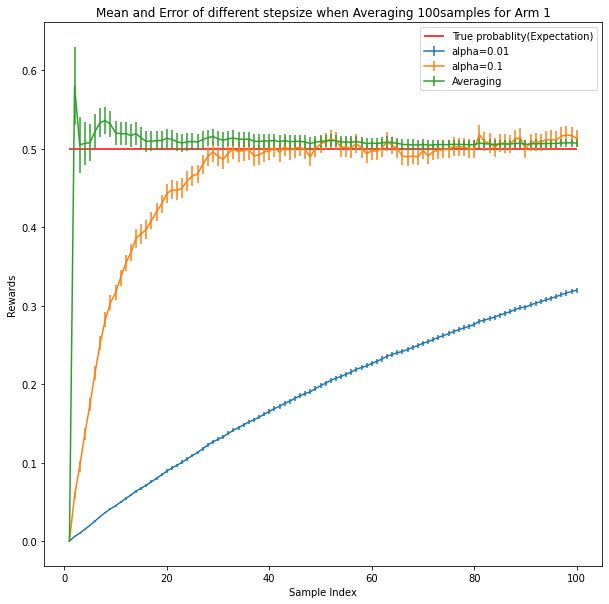

In [ ]:
repeat_experiment(0)

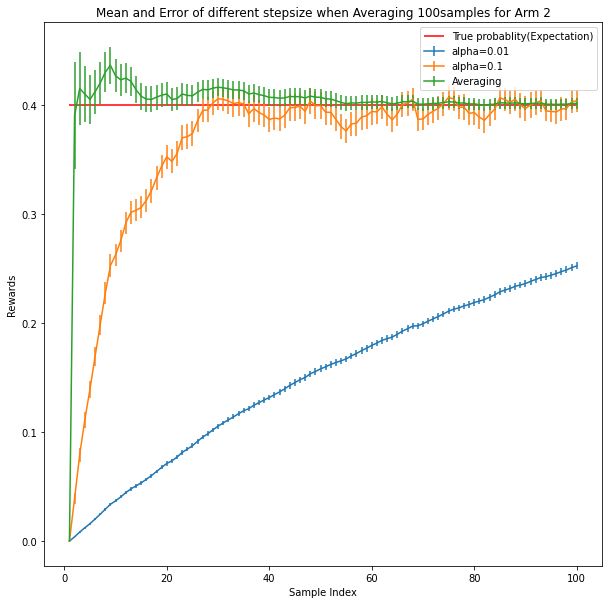

In [ ]:
repeat_experiment(1)

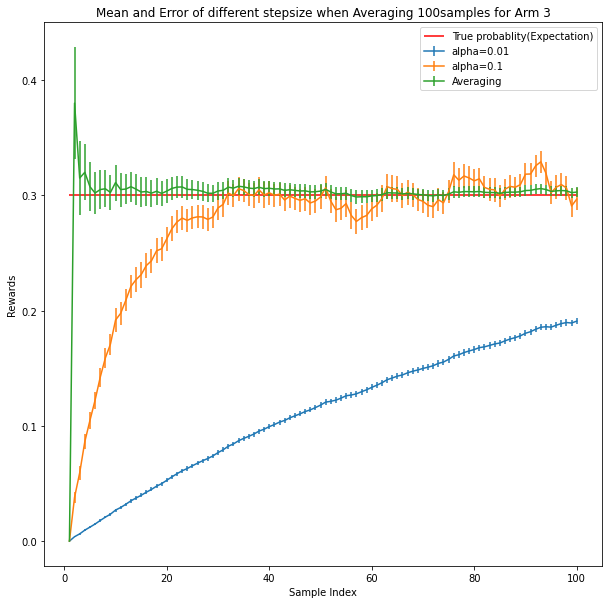

In [ ]:
repeat_experiment(2)

## Q4

**Conclusion**  

From the graph below, we can see that $\epsilon= 0$ exhibit stright lines in `(b)`, `(c)` & `(d)`, which is because the algorithm would stick to its choice in the first time step when there is no exploration.

For the other values of $\epsilon$, it can be observed that the larger the value is, the worse it performs overall (in terms of all four graphs/metrics). This means that $\epsilon = 0.125$ could be an ideal choice for this setup that balances exploration and exploitation well.

In [ ]:
def epsilon_greedy(epsilon,bandit=q1bandit,alpha = "averaging", dynamic=False):
    rewards = []
    optimal_times = []
    regrets = []
    armnumber = bandit.armnumber
    Qs = [0] * armnumber
    Ns = [0] * armnumber
    for i in range(1000):
        if i == 500 and dynamic:
            bandit.ps = [0.5, 0.6, 0.7]
        if(random.choices(population=[True,False],
                          weights=[epsilon,1-epsilon],k=1)[0]): # if epsilon
            actionchoice = random.randint(0,armnumber-1)
        else:
            maxQ = max(Qs)
            indices = [i for i, j in enumerate(Qs) if j == maxQ]
            actionchoice = random.choice(indices)
        reward = bandit.sample(actionchoice)[0]
        #update Qt and Nt
        Ns[actionchoice] += 1
        if alpha == "averaging":
            Qs[actionchoice] = update(Qs[actionchoice],
                                      1/Ns[actionchoice],reward)
        else:
            Qs[actionchoice] = update(Qs[actionchoice],alpha,reward)
        rewards.append(reward)
        if(actionchoice == 0):
            optimal_times.append(1)
        else:
            optimal_times.append(0)
        regrets.append(max(bandit.ps)- bandit.ps[actionchoice])
    bandit.ps = [0.5, 0.4, 0.3]
    return rewards,optimal_times,regrets

In [ ]:
# store for all epsilon
reward_avg = []
reward_err = []
optimal_action_rate = []
instantaneous_regret_avg = []
total_regret_avg = []
xaxis = np.arange(1000)
epsilons = [0, 1 / 8, 1 / 4, 1 / 2, 1]
for epsilon in epsilons:
    reward_all_trial = []
    fraction_optimal_all_trial = []
    instantaneous_regret_all_trial = []
    for i in range(100):
        rewards, optimal_times, regrets = epsilon_greedy(epsilon)
        reward_all_trial.append(rewards)
        fraction_optimal_all_trial.append(optimal_times)
        instantaneous_regret_all_trial.append(regrets)
    reward_avg.append(np.mean(reward_all_trial, axis=0))
    reward_err.append(np.std(reward_all_trial, axis=0) / 10)
    optimal_action_rate.append(np.mean(fraction_optimal_all_trial, axis=0))
    instantaneous_regret_avg.append(np.mean(
        instantaneous_regret_all_trial, axis=0))
    total_regret_avg.append(
        np.mean(np.cumsum(instantaneous_regret_all_trial, axis=1), axis=0)
    )


### (a)

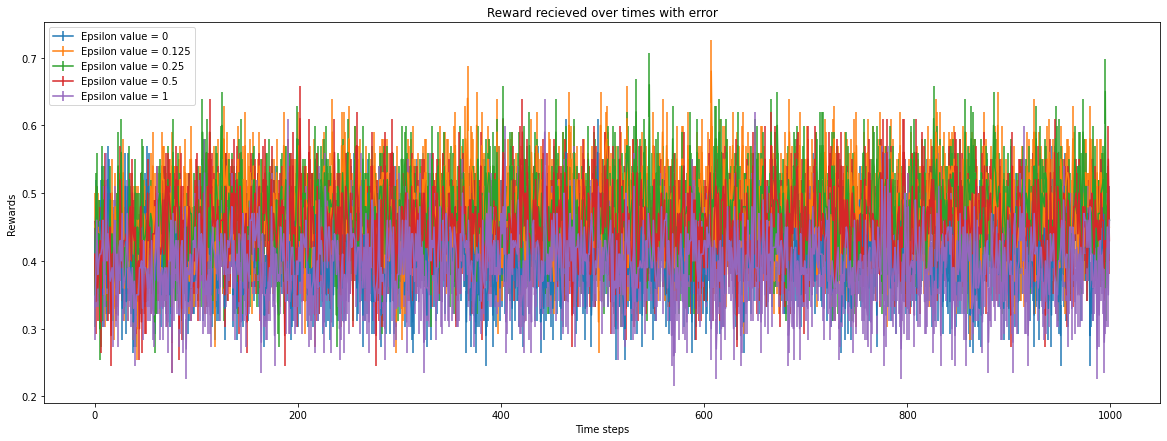

In [ ]:
plt.figure(figsize=(20, 7))
for j in range(5):
  plt.errorbar(xaxis,reward_avg[j],yerr = reward_err[j], 
               label = "Epsilon value = {0}".format(epsilons[j]))
plt.xlabel("Time steps")
plt.ylabel("Rewards")
plt.title("Reward recieved over times with error")
plt.legend()
plt.show()

### (b)

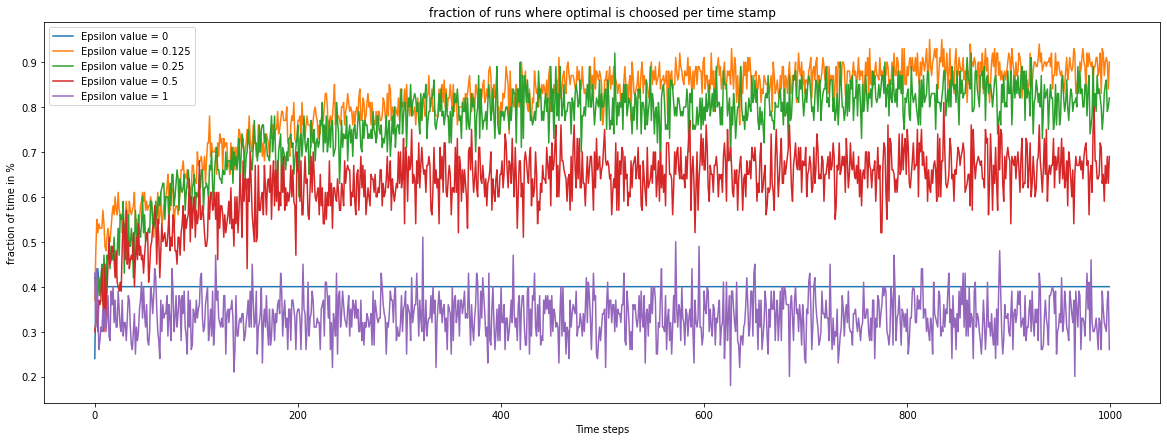

In [ ]:
plt.figure(figsize=(20, 7))
for j in range(5):
    plt.plot(xaxis,optimal_action_rate[j],
             label = "Epsilon value = {0}".format(epsilons[j]))
plt.xlabel("Time steps")
plt.ylabel("fraction of time in %")
plt.title("fraction of runs where optimal is choosed per time stamp")
plt.legend()
plt.show()

### (c)

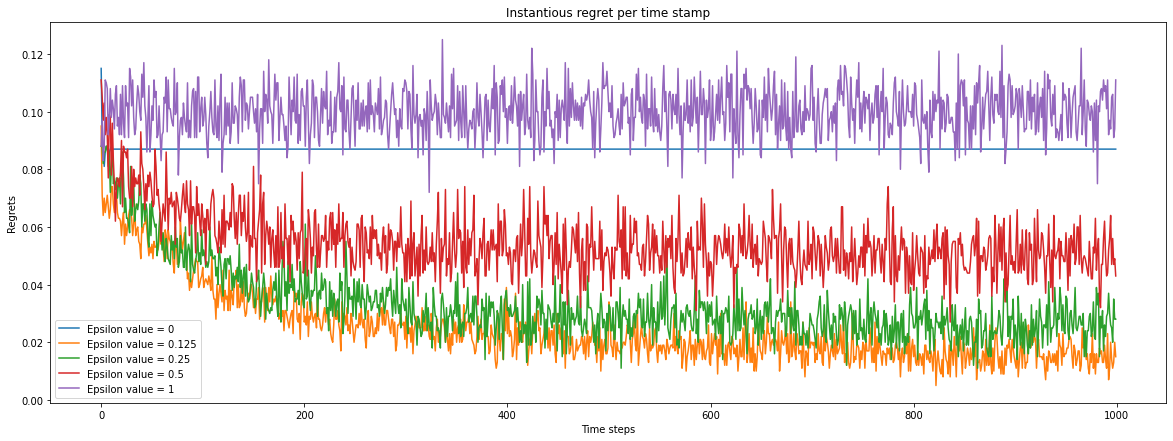

In [ ]:
plt.figure(figsize=(20, 7))
for j in range(5):
    plt.plot(xaxis,instantaneous_regret_avg[j],
             label = "Epsilon value = {0}".format(epsilons[j]))
plt.xlabel("Time steps")
plt.ylabel("Regrets")
plt.title("Instantious regret per time stamp")
plt.legend()
plt.show()

### (d)

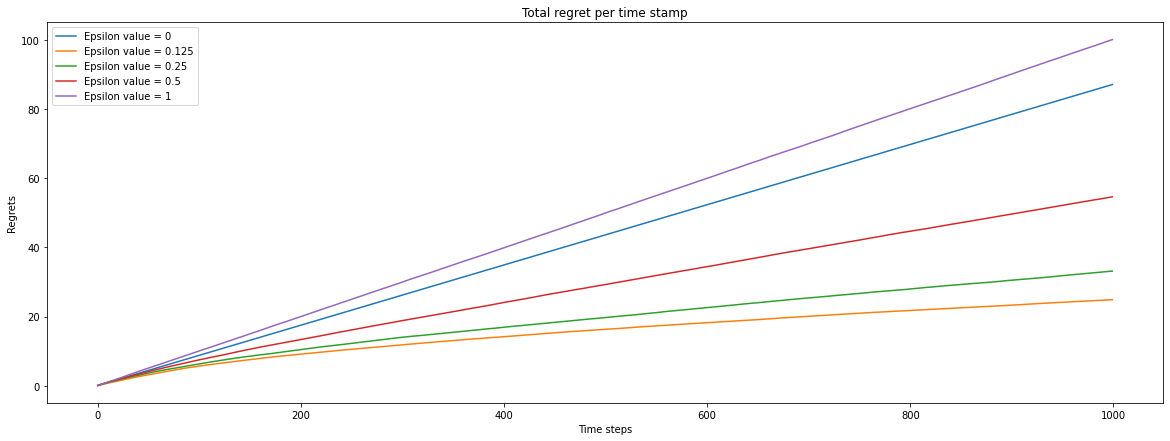

In [ ]:
plt.figure(figsize=(20, 7))
for j in range(5):
    plt.plot(xaxis,total_regret_avg[j],
             label = "Epsilon value = {0}".format(epsilons[j]))
plt.xlabel("Time steps")
plt.ylabel("Regrets")
plt.title("Total regret per time stamp")
plt.legend()
plt.show()

## Q5

**Conclusion**  
Overall, $\epsilon = 0.125$ performs better than $\epsilon = 0.25$ in all four metrics across all values of $\alpha$, which corroborates to the conclusion from `Q4.`.

As for $\alpha$, the averaging method exibits the best performance. $\alpha=0.1$ appears to be the second best.

In [ ]:
def q5_plot(epsilon):
    reward_avg = []
    reward_err = []
    optimal_action_rate = []
    instantaneous_regret_avg = []
    total_regret_avg = []
    xaxis = np.arange(1000)
    for alpha in (0.1, 0.01, 0.001, 'averaging'):
        reward_all_trial = []
        fraction_optimal_all_trial = []
        instantaneous_regret_all_trial = []
        for i in range(100):
            rewards,optimal_times,regrets = epsilon_greedy(epsilon, alpha=alpha)
            reward_all_trial.append(rewards)
            fraction_optimal_all_trial.append(optimal_times)
            instantaneous_regret_all_trial.append(regrets)
        reward_avg.append(np.mean(reward_all_trial,axis=0))
        reward_err.append(np.std(reward_all_trial,axis=0) / 10)
        optimal_action_rate.append(
            np.mean(fraction_optimal_all_trial,axis=0))
        instantaneous_regret_avg.append(
            np.mean(instantaneous_regret_all_trial,axis=0))
        total_regret_avg.append(np.mean(
            np.cumsum(instantaneous_regret_all_trial,axis=1),axis=0))
    
    fig, axes = plt.subplots(4, 1, figsize=(20, 30))
    for j, alpha in enumerate((0.1, 0.01, 0.001, 'averaging')):
        axes[0].errorbar(xaxis,reward_avg[j],
                         yerr = reward_err[j],label = f"alpha = {alpha}")
        axes[1].plot(xaxis,optimal_action_rate[j],
                     label = f"alpha = {alpha}")
        axes[2].plot(xaxis,instantaneous_regret_avg[j],
                     label = f"alpha = {alpha}")
        axes[3].plot(xaxis,total_regret_avg[j],
                     label = f"alpha = {alpha}")

    axes[0].set(xlabel="Time steps", ylabel="Rewards", 
                title="Reward recieved over times with error")
    axes[0].legend()

    axes[1].set(
        xlabel="Time steps", ylabel="fraction of time in %", 
        title="fraction of runs where optimal is choosed per time stamp")
    axes[1].legend()

    axes[2].set(
        xlabel="Time steps", ylabel="Regrets", 
        title="Instantious regret per time stamp")
    axes[2].legend()    

    axes[3].set(
        xlabel="Time steps", ylabel="Regrets", 
        title="Total regret per time stamp")
    axes[3].legend()

    plt.show()


### $\epsilon = \frac{1}{4}$

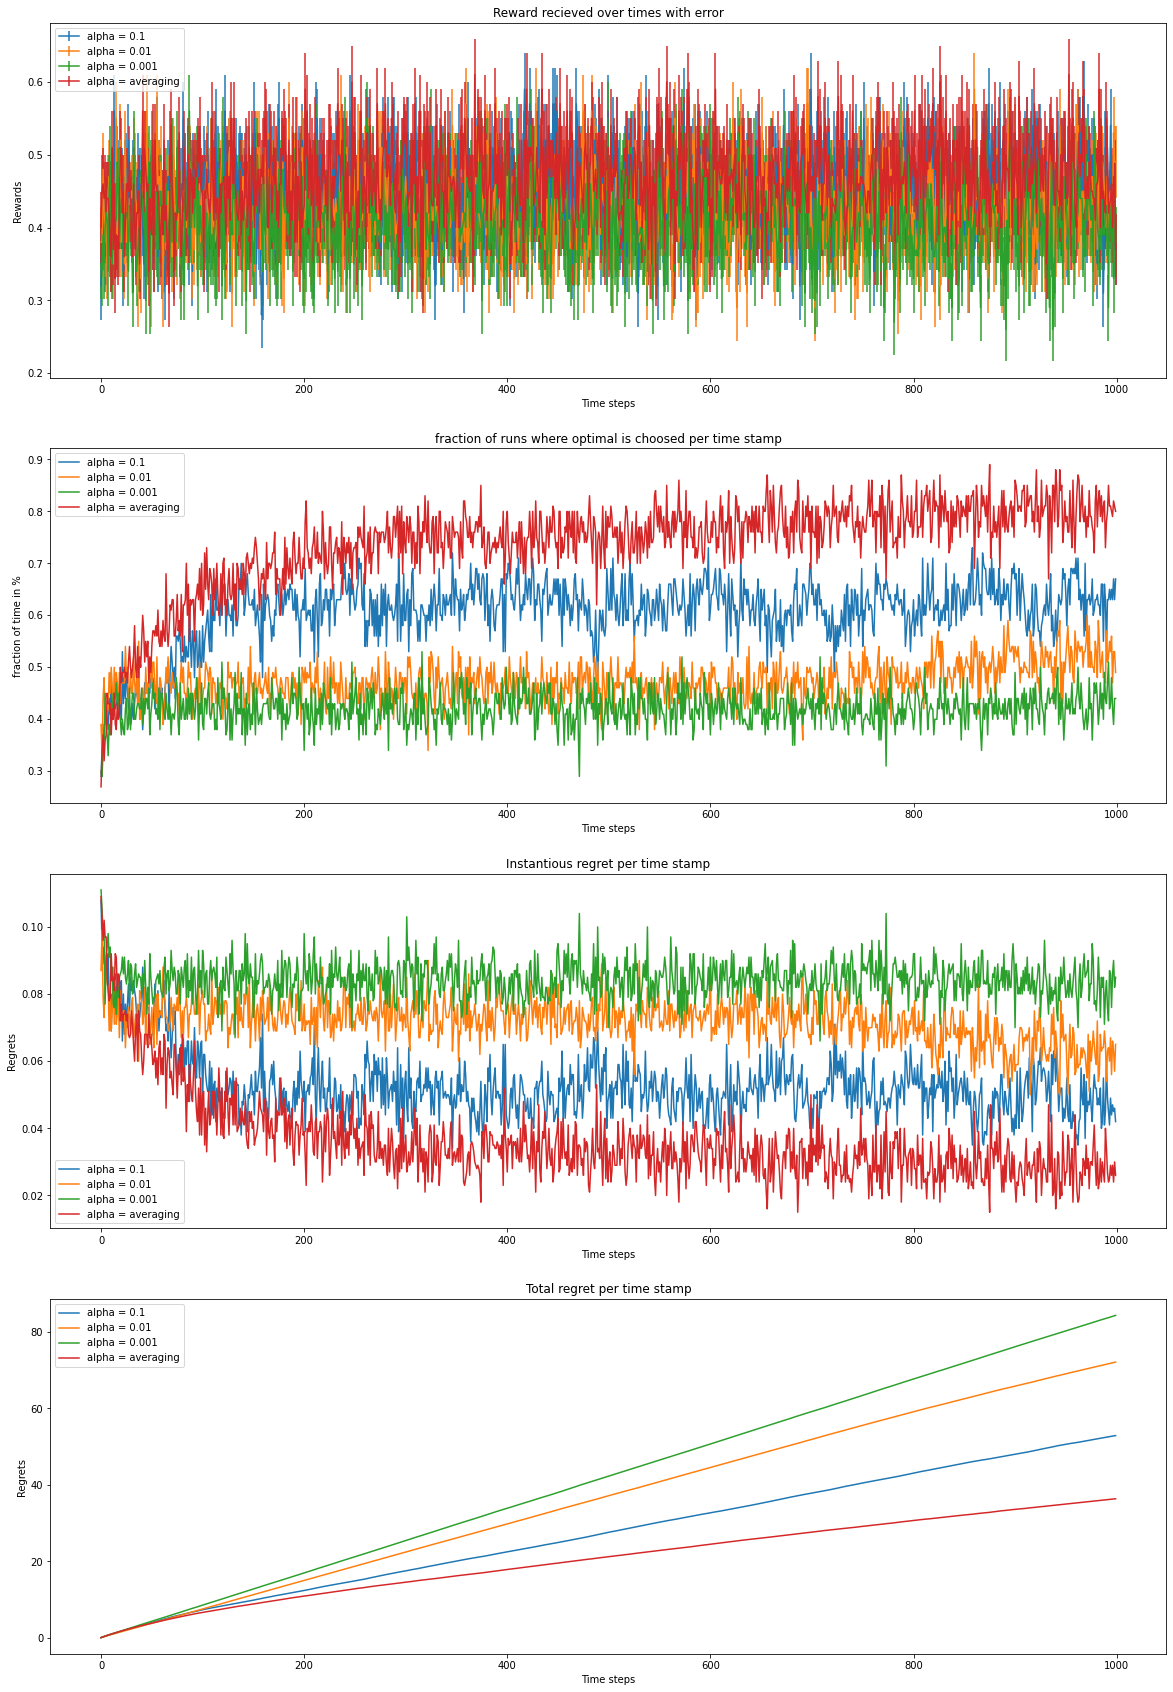

In [ ]:
q5_plot(0.25)

### $\epsilon = \frac{1}{8}$

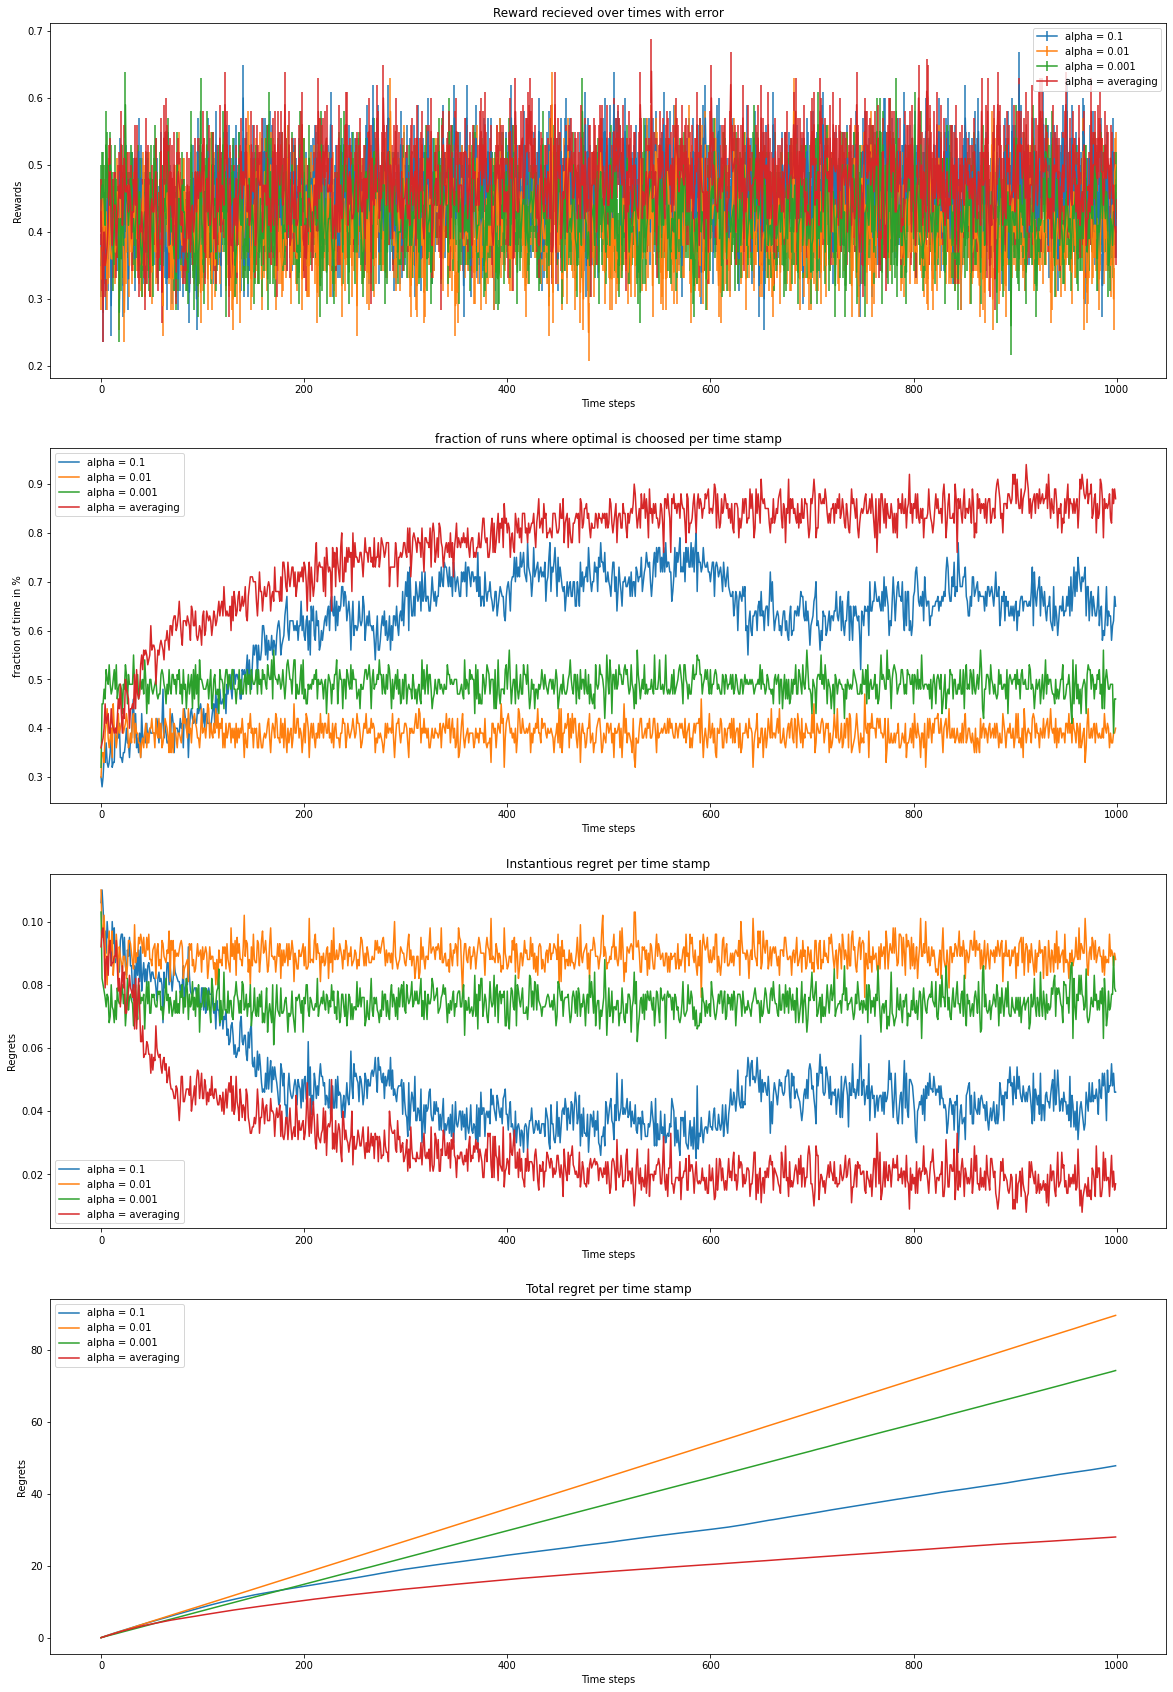

In [ ]:
q5_plot(0.125)

## Q6


**Conclusion**

Overall, $\alpha = 0.001$ displays the best performance in the long run, while also having the largest fluctuation for earlier time steps. 

We believe the bad initial results for $\alpha = 0.001$ is simply due to the fact that it has a slow convergence speed. But once it does converge around an optimal value, a small $\alpha$ ensure that it won't "overshoot" by moving away (from the optimal one) to inferior values too fast.

In [ ]:
def UCB_algo(c=2,bandit=q1bandit,alpha = "averaging",dynamic=False):
    rewards = []
    optimal_times = []
    regrets = []
    armnumber = bandit.armnumber
    Qs = [0] * armnumber
    Ns = [0] * armnumber
    for t in range(1, 1001):
        if t == 501 and dynamic:
            bandit.ps = [0.5, 0.6, 0.7]
        if t <= armnumber:
            actionchoice = t - 1
        else: 
            UCBS = [Qs[index] + c * np.sqrt(np.log(t) / Ns[index]) 
            for index in range(len(Qs))]
            actionchoice = UCBS.index(max(UCBS))
        reward = bandit.sample(actionchoice)[0]
        #update Qt and Nt
        Ns[actionchoice] += 1
        if alpha == "averaging":
            Qs[actionchoice] = update(Qs[actionchoice],
                                      1/Ns[actionchoice],reward)
        else:
            Qs[actionchoice] = update(Qs[actionchoice],alpha,reward)
        rewards.append(reward)
        if(actionchoice == 0):
            optimal_times.append(1)
        else:
            optimal_times.append(0)
        regrets.append(max(bandit.ps)- bandit.ps[actionchoice])
    bandit.ps = [0.5, 0.4, 0.3]
    return rewards,optimal_times,regrets

In [ ]:
def q6_plot():
    reward_avg = []
    reward_err = []
    optimal_action_rate = []
    instantaneous_regret_avg = []
    total_regret_avg = []
    xaxis = np.arange(1000)
    for alpha in (0.1, 0.01, 0.001, 'averaging'):
        reward_all_trial = []
        fraction_optimal_all_trial = []
        instantaneous_regret_all_trial = []
        for i in range(100):
            rewards,optimal_times,regrets = UCB_algo(alpha=alpha)
            reward_all_trial.append(rewards)
            fraction_optimal_all_trial.append(optimal_times)
            instantaneous_regret_all_trial.append(regrets)
        reward_avg.append(np.mean(reward_all_trial,axis=0))
        reward_err.append(np.std(reward_all_trial,axis=0) / 10)
        optimal_action_rate.append(
            np.mean(fraction_optimal_all_trial,axis=0))
        instantaneous_regret_avg.append(
            np.mean(instantaneous_regret_all_trial,axis=0))
        total_regret_avg.append(np.mean(
            np.cumsum(instantaneous_regret_all_trial,axis=1),axis=0))
    
    fig, axes = plt.subplots(4, 1, figsize=(20, 30))
    for j, alpha in enumerate((0.1, 0.01, 0.001, 'averaging')):
        axes[0].errorbar(xaxis,reward_avg[j],
                         yerr = reward_err[j],label = f"alpha = {alpha}")
        axes[1].plot(xaxis,optimal_action_rate[j],
                     label = f"alpha = {alpha}")
        axes[2].plot(xaxis,instantaneous_regret_avg[j],
                     label = f"alpha = {alpha}")
        axes[3].plot(xaxis,total_regret_avg[j],
                     label = f"alpha = {alpha}")

    axes[0].set(xlabel="Time steps", ylabel="Rewards", 
                title="Reward recieved over times with error")
    axes[0].legend()

    axes[1].set(
        xlabel="Time steps", ylabel="fraction of time in %", 
        title="fraction of runs where optimal is choosed per time stamp")
    axes[1].legend()

    axes[2].set(
        xlabel="Time steps", ylabel="Regrets", 
        title="Instantious regret per time stamp")
    axes[2].legend()    

    axes[3].set(
        xlabel="Time steps", ylabel="Regrets", 
        title="Total regret per time stamp")
    axes[3].legend()

    plt.show()

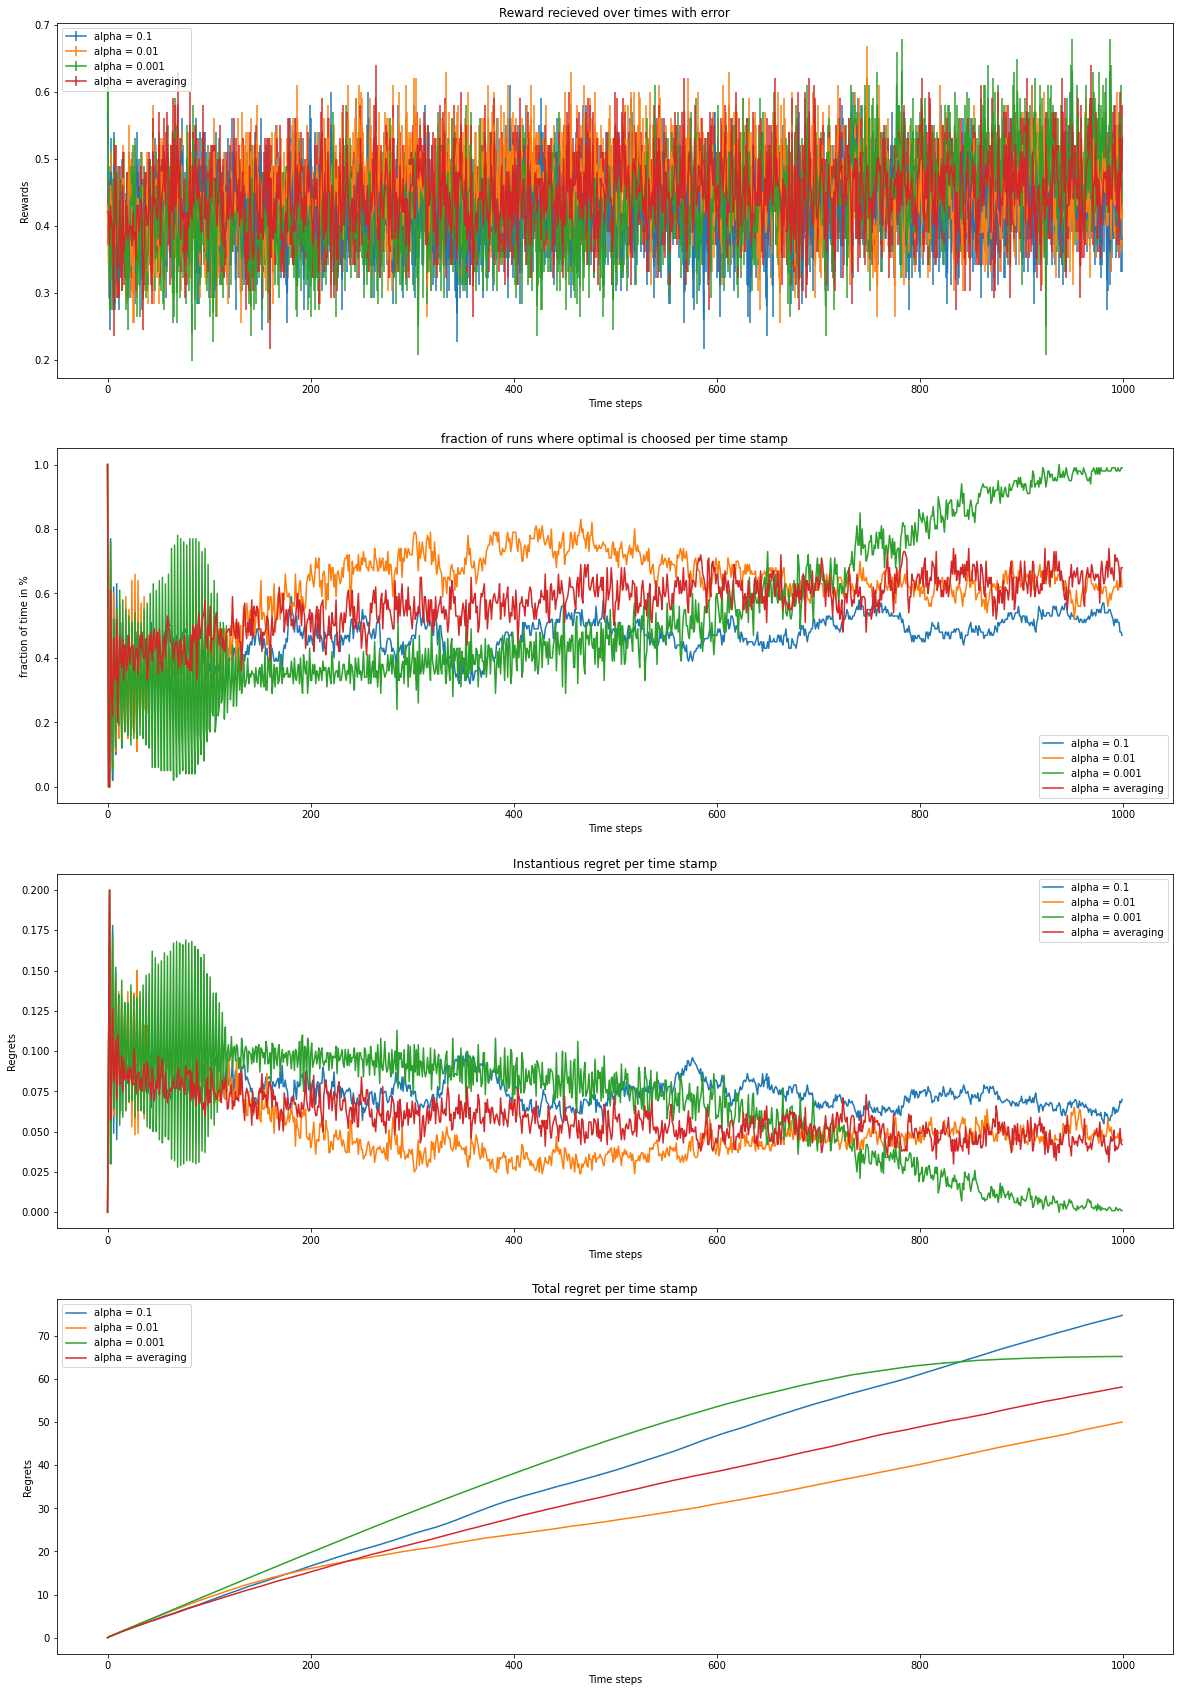

In [ ]:
q6_plot()

## Q7

**Conclusion**  
It can be observed that when compared to previous experiments, Thompson sampling displays a faster rate of converging to an optimal level. For example, the % of times when the optimal choice is taken quickly rises to a level of ~80% after around 200 time steps, which is much higher than tose in previous questions.

In [ ]:
def Thompson_sampling(bandit = q1bandit, dynamic=False):
    paras = []
    rewards = []
    optimal_times = []
    regrets = []
    armnumber = bandit.armnumber
    for i in range(armnumber):
        paras.append([1,1])
    for t in range(1000):
        if t == 500 and dynamic:
            bandit.ps = [0.5, 0.6, 0.7]
        samples = []
        for j in range(armnumber):
            alpha,beta = paras[j]
            samples.append(np.random.beta(a=alpha,b=beta))
        actionchoice = samples.index(max(samples))
        reward = bandit.sample(actionchoice)[0]
        #update alpha and beta
        if reward > 0:
            paras[actionchoice][0] += 1
        else:
            paras[actionchoice][1] += 1
        #for graphing
        rewards.append(reward)
        if(actionchoice == 0):
            optimal_times.append(1)
        else:
            optimal_times.append(0)
        regrets.append(max(bandit.ps)- bandit.ps[actionchoice])
    bandit.ps = [0.5, 0.4, 0.3]
    return rewards,optimal_times,regrets

In [ ]:
def q7_plot():
    reward_avg = []
    reward_err = []
    optimal_action_rate = []
    instantaneous_regret_avg = []
    total_regret_avg = []
    xaxis = np.arange(1000)
    reward_all_trial = []
    fraction_optimal_all_trial = []
    instantaneous_regret_all_trial = []
    for i in range(100):
        rewards,optimal_times,regrets = Thompson_sampling()
        reward_all_trial.append(rewards)
        fraction_optimal_all_trial.append(optimal_times)
        instantaneous_regret_all_trial.append(regrets)
    reward_avg.append(np.mean(reward_all_trial,axis=0))
    reward_err.append(np.std(reward_all_trial,axis=0) / 10)
    optimal_action_rate.append(np.mean(fraction_optimal_all_trial,axis=0))
    instantaneous_regret_avg.append(
        np.mean(instantaneous_regret_all_trial,axis=0))
    total_regret_avg.append(
        np.mean(np.cumsum(instantaneous_regret_all_trial,axis=1),axis=0))
    fig, axes = plt.subplots(4, 1, figsize=(20, 30))
    axes[0].errorbar(xaxis,reward_avg[0],yerr = reward_err[0])
    axes[1].plot(xaxis,optimal_action_rate[0])
    axes[2].plot(xaxis,instantaneous_regret_avg[0])
    axes[3].plot(xaxis,total_regret_avg[0])
    axes[0].set(xlabel="Time steps", ylabel="Rewards", 
                title="Reward recieved over times with error")
    axes[1].set(
        xlabel="Time steps", ylabel="fraction of time in %", 
        title="fraction of runs where optimal is choosed per time stamp")
    axes[2].set(
        xlabel="Time steps", ylabel="Regrets", 
        title="Instantious regret per time stamp")   
    axes[3].set(
        xlabel="Time steps", ylabel="Regrets", 
        title="Total regret per time stamp")
    plt.show()

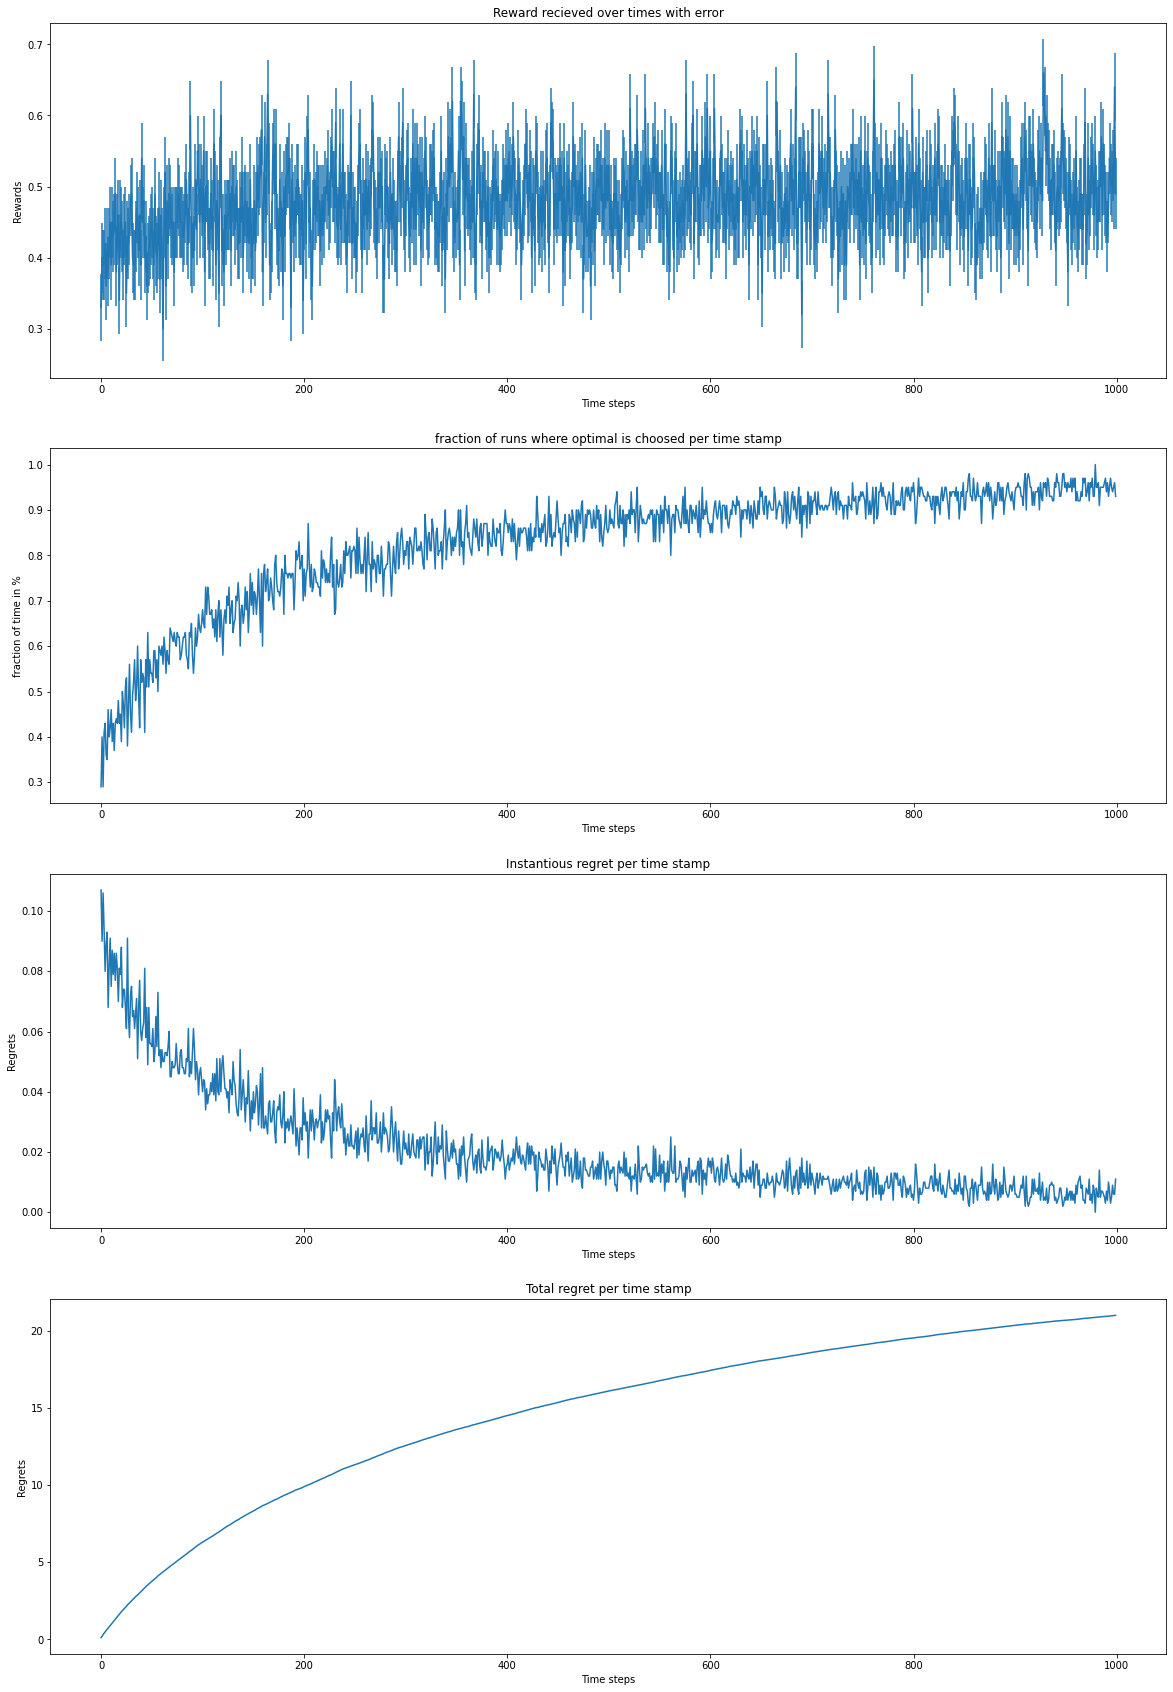

In [ ]:
q7_plot()

## Q8

**Best hyper-parameter combination**
* For $\epsilon$-greedy: $\epsilon = 0.125, \alpha = averaging$
* For UCB: $\alpha = 0.001$

**Selection Criteria**   
We take all four plots/metrices into account when evaluating the combinations. For `reward over time` and `fraction of optimal runs`, the larger the values are, the better. For the other two, the smaller the valuesa are, the better. We then single out the combination with the best overall performance.

**Observation**  
As can be seen from the steep upticks of the orange curve in the second and third plots below, UCB clearly outperforms $\epsilon$-greedy and Thompson sampling by a lot in the long run. 

In the last plot, we can see that despite UCB's efforts to catch up, it is still not enough to make up for the large regrets caused by its unstable initial performance (explained in `Q6`), resulting in a larger total regret for UCB. Thus depending on the settings if the timestamp is small $\epsilon$-greedy should be chosen since it fits with smallest timestamp. As for larger timestamp UCB is the best as we could observe from the total regret graph that UCB is learning in an non-linear way as the total regret curve become logrithmic like. For Thompson sampling it is somewhere in the middle it also have a logrithmic like total regret curve but performs a little bit worse than UCB in the long run and $\epsilon$-greedy in the short run that could be observed in `fraction of optimal runs` in runs close to 1000.

In [ ]:
j=3
print(f"Epsilon Greedy" if j == 0 else "Thompson" if j == 1 else "UCB")

UCB


In [ ]:
def q8_plot():
    reward_avg = []
    reward_err = []
    optimal_action_rate = []
    instantaneous_regret_avg = []
    total_regret_avg = []
    xaxis = np.arange(1000)
    reward_all_trial = []
    fraction_optimal_all_trial = []
    instantaneous_regret_all_trial = []
    #greedy
    for i in range(100):
        rewards,optimal_times,regrets = epsilon_greedy(0.125, 
                                                       alpha='averaging')
        reward_all_trial.append(rewards)
        fraction_optimal_all_trial.append(optimal_times)
        instantaneous_regret_all_trial.append(regrets)
    reward_avg.append(np.mean(reward_all_trial,axis=0))
    reward_err.append(np.std(reward_all_trial,axis=0) / 10)
    optimal_action_rate.append(
        np.mean(fraction_optimal_all_trial,axis=0))
    instantaneous_regret_avg.append(
        np.mean(instantaneous_regret_all_trial,axis=0))
    total_regret_avg.append(
        np.mean(np.cumsum(instantaneous_regret_all_trial,axis=1),axis=0))
    
    #UCB
    reward_all_trial = []
    fraction_optimal_all_trial = []
    instantaneous_regret_all_trial = []
    for i in range(100):
        rewards,optimal_times,regrets = UCB_algo(alpha=0.001)
        reward_all_trial.append(rewards)
        fraction_optimal_all_trial.append(optimal_times)
        instantaneous_regret_all_trial.append(regrets)
    reward_avg.append(np.mean(reward_all_trial,axis=0))
    reward_err.append(np.std(reward_all_trial,axis=0) / 10)
    optimal_action_rate.append(
        np.mean(fraction_optimal_all_trial,axis=0))
    instantaneous_regret_avg.append(
        np.mean(instantaneous_regret_all_trial,axis=0))
    total_regret_avg.append(np.mean(
        np.cumsum(instantaneous_regret_all_trial,axis=1),axis=0))
    
    #Thompson
    reward_all_trial = []
    fraction_optimal_all_trial = []
    instantaneous_regret_all_trial = []
    for i in range(100):
        rewards,optimal_times,regrets = Thompson_sampling()
        reward_all_trial.append(rewards)
        fraction_optimal_all_trial.append(optimal_times)
        instantaneous_regret_all_trial.append(regrets)
    reward_avg.append(np.mean(reward_all_trial,axis=0))
    reward_err.append(np.std(reward_all_trial,axis=0) / 10)
    optimal_action_rate.append(
        np.mean(fraction_optimal_all_trial,axis=0))
    instantaneous_regret_avg.append(
        np.mean(instantaneous_regret_all_trial,axis=0))
    total_regret_avg.append(np.mean(
        np.cumsum(instantaneous_regret_all_trial,axis=1),axis=0))
    
    #graphing
    fig, axes = plt.subplots(4, 1, figsize=(20, 30))

    for j in range(3):
        axes[0].errorbar(xaxis,reward_avg[j],yerr = reward_err[j],
                         label = f"Epsilon Greedy" if j == 0 else "Thompson" if 
                         j == 2 else "UCB")
        axes[1].plot(xaxis,optimal_action_rate[j],
                     label = f"Epsilon Greedy" if j == 0 else "Thompson" if 
                     j == 2 else "UCB")
        axes[2].plot(xaxis,instantaneous_regret_avg[j],
                     label = f"Epsilon Greedy" if j == 0 else "Thompson" if 
                     j == 2 else "UCB")
        axes[3].plot(xaxis,total_regret_avg[j],
                     label = f"Epsilon Greedy" if j == 0 else "Thompson" if 
                     j == 2 else "UCB")
    
    axes[0].set(xlabel="Time steps", ylabel="Rewards", 
                title="Reward recieved over times with error")
    axes[0].legend()

    axes[1].set(
        xlabel="Time steps", ylabel="fraction of time in %", 
        title="fraction of runs where optimal is choosed per time stamp")
    axes[1].legend()

    axes[2].set(
        xlabel="Time steps", ylabel="Regrets", 
        title="Instantious regret per time stamp")
    axes[2].legend()    

    axes[3].set(
        xlabel="Time steps", ylabel="Regrets", 
        title="Total regret per time stamp")
    axes[3].legend()

    plt.show()

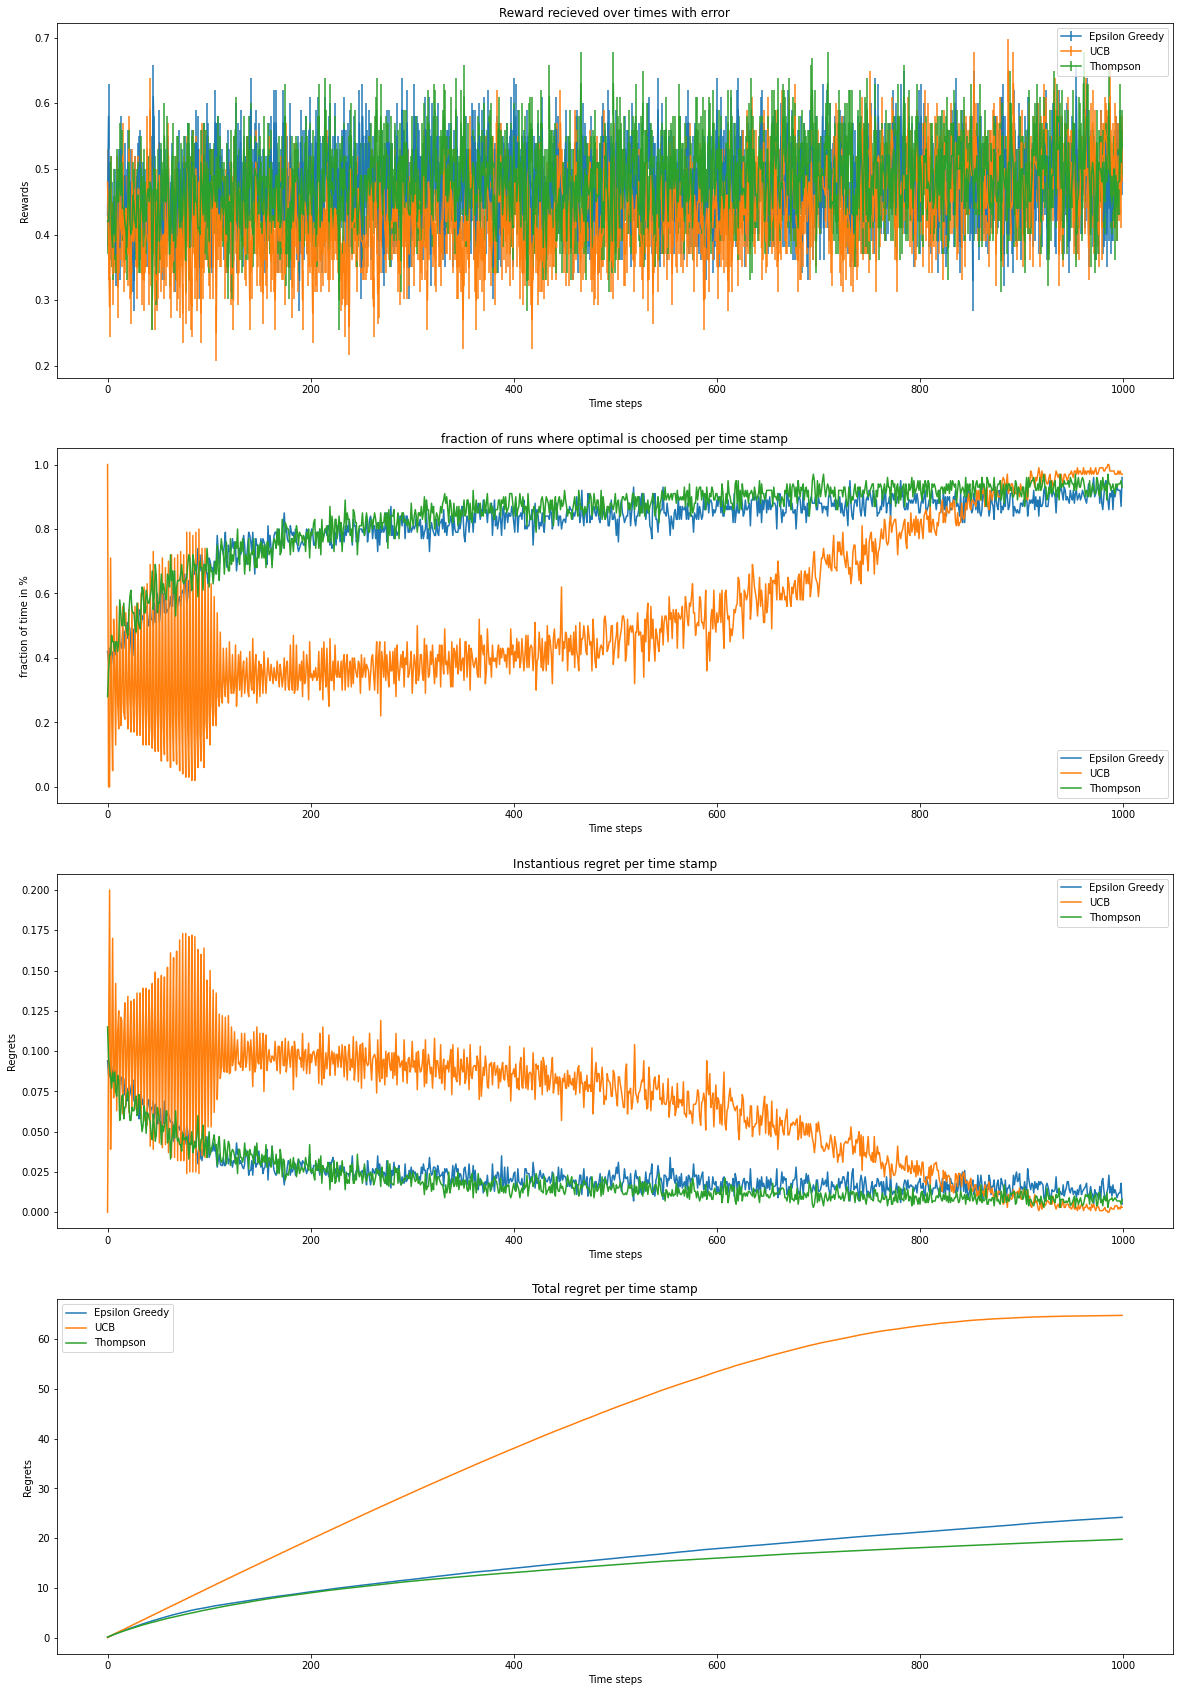

In [ ]:
q8_plot()

## Q9

**Observation**  
It is evident from the graph below that both UCB and $\epsilon$-greedy display steep upticks around time step = 500, while Thompson is only slightly affected by a change in parameters. We think this could be attributed to the fact that the update process of Thompson sampling, based on Bayes' rule, reacts to changes in environments much more slowly than action-value based UCB and $\epsilon$-greedy algorithms. 

Overall, we beileve that UCB shows a clear advantage over the other two based on the reward graphs (especially when $\alpha=averaging$) & is best suited to cope with non-stationarity.

In [ ]:
def q9_plot(a):
    reward_avg = []
    reward_err = []
    xaxis = np.arange(1000)
    reward_all_trial = []
    for i in range(100):
        rewards,optimal_times,regrets = epsilon_greedy(0.125, alpha=a, 
                                                       dynamic=True)
        reward_all_trial.append(rewards)
        fraction_optimal_all_trial.append(optimal_times)
        instantaneous_regret_all_trial.append(regrets)
    reward_avg.append(np.mean(reward_all_trial,axis=0))
    reward_err.append(np.std(reward_all_trial,axis=0) / 10)

    reward_all_trial = []
    for i in range(100):
        rewards,optimal_times,regrets = UCB_algo(alpha=a, dynamic=True)
        reward_all_trial.append(rewards)
        fraction_optimal_all_trial.append(optimal_times)
        instantaneous_regret_all_trial.append(regrets)
    reward_avg.append(np.mean(reward_all_trial,axis=0))
    reward_err.append(np.std(reward_all_trial,axis=0) / 10)

    reward_all_trial = []
    for i in range(100):
        rewards,optimal_times,regrets = Thompson_sampling(dynamic=True)
        reward_all_trial.append(rewards)
        fraction_optimal_all_trial.append(optimal_times)
        instantaneous_regret_all_trial.append(regrets)
    reward_avg.append(np.mean(reward_all_trial,axis=0))
    reward_err.append(np.std(reward_all_trial,axis=0) / 10) 

    plt.figure(figsize=(20, 7))
    labels = ("Epsilon-Greedy", "UCB", "Thompson")
    for j in range(3):
        plt.errorbar(xaxis,reward_avg[j],
                     yerr = reward_err[j],label = labels[j])

    plt.ylabel("Rewards")
    plt.title(f"Reward recieved over times with error, alpha = {a}")
    plt.legend()
    plt.show()

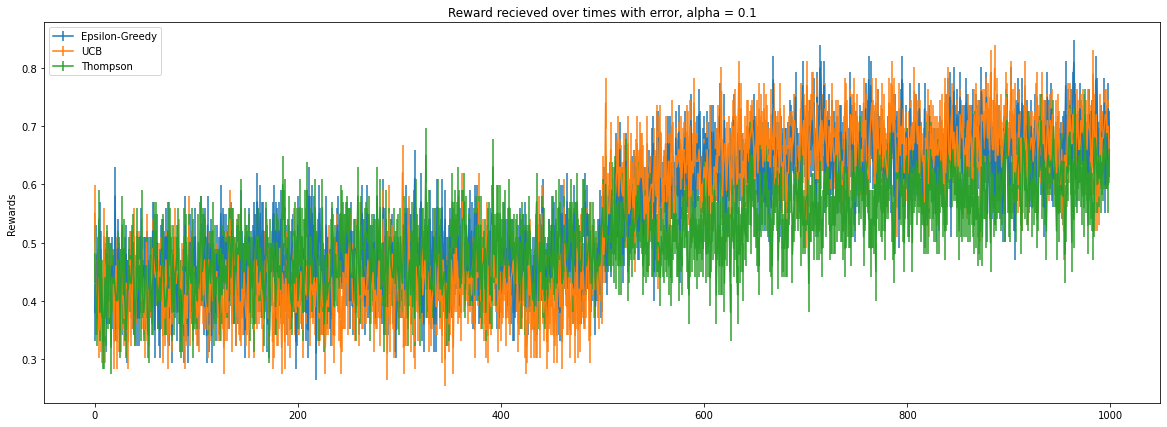

In [ ]:
q9_plot(0.1)

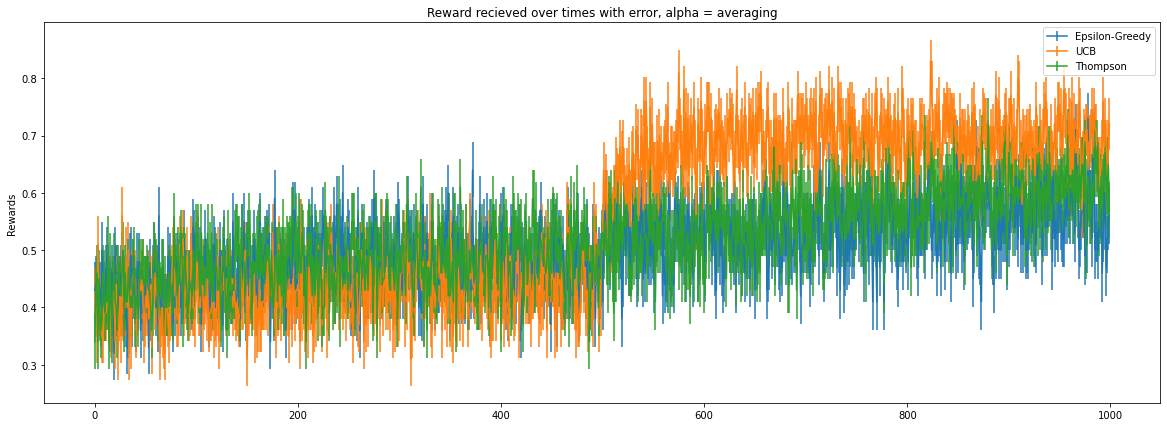

In [ ]:
q9_plot('averaging')